In [22]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
file_path = 'result.csv'
df = pd.read_csv(file_path)

# 데이터 확인
df.head()

# 종속 변수와 독립 변수 설정
X = df[['Group', 'LSTM', 'conv', 'augmented', 'frame']]
Y = df['mAP']

# 회귀 분석 모델 적합
print('OLS Regression Results (mAP)')
model = sm.OLS(Y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())
print('=======================================================================================')
print('\n\n\n')
print('OLS Regression Results (ECE)')
# 종속 변수와 독립 변수 설정
X = df[['Group', 'LSTM', 'conv', 'augmented', 'frame']]
Y = df['ECE']

# 회귀 분석 모델 적합
model = sm.OLS(Y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())


OLS Regression Results (mAP)
                                 OLS Regression Results                                
Dep. Variable:                    mAP   R-squared (uncentered):                   0.909
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              564.6
Date:                Thu, 13 Jun 2024   Prob (F-statistic):                   6.66e-145
Time:                        22:52:59   Log-Likelihood:                         -44.763
No. Observations:                 288   AIC:                                      99.53
Df Residuals:                     283   BIC:                                      117.8
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

In [23]:
# 기본 통계 요약
summary_stats = df.describe()
print(summary_stats)
print('==============================================================================')

              ECE      Group       LSTM        conv  augmented       frame  \
count  288.000000  288.00000  288.00000  288.000000  288.00000  288.000000   
mean     0.064485    0.50000    0.50000    3.500000    0.50000    6.000000   
std      0.023576    0.50087    0.50087    1.710798    0.50087    3.421596   
min      0.024404    0.00000    0.00000    1.000000    0.00000    1.000000   
25%      0.051048    0.00000    0.00000    2.000000    0.00000    3.000000   
50%      0.061271    0.50000    0.50000    3.500000    0.50000    6.000000   
75%      0.073081    1.00000    1.00000    5.000000    1.00000    9.000000   
max      0.231000    1.00000    1.00000    6.000000    1.00000   11.000000   

              mAP  normal_acc  mandown_acc   cross_acc  
count  288.000000  288.000000   288.000000  288.000000  
mean     0.936217    0.977585     0.922176    0.908889  
std      0.021231    0.014895     0.020228    0.042429  
min      0.852017    0.890685     0.848939    0.695896  
25%      0.9

In [24]:
# 상관 계수 행렬
correlation_matrix = df.corr()
"""
             Group              LSTM              conv            augmented          frame            mAP           ECE      
Group     1.000000e+00,     1.619075e-17,     1.083467e-17,    -7.709882e-18,     9.074034e-17,    -0.200593,    -0.021783
frame     1.619075e-17,     1.000000e+00,    -5.417334e-18,    -4.009139e-17,     1.986356e-17,     0.031799,    -0.046241
LSTM      1.083467e-17,    -5.417334e-18,     1.000000e+00,     5.327045e-17,     2.114711e-17,     0.036204,     0.044185
augment  -7.709882e-18,    -4.009139e-17,     5.327045e-17,     1.000000e+00,    -1.372391e-16,    -0.138181,    -0.156874
conv      9.074034e-17,     1.986356e-17,     2.114711e-17,    -1.372391e-16,     1.000000e+00,     0.030470,    -0.262099
mAP      -2.005928e-01,     3.179882e-02,     3.620435e-02,    -1.381805e-01,     3.047009e-02,     1.000000,    -0.119297
ECE      -2.178255e-02,    -4.624114e-02,     4.418548e-02,    -1.568738e-01,    -2.620994e-01,    -0.119297,     1.000000
"""

'\n             Group              LSTM              conv            augmented          frame            mAP           ECE      \nGroup     1.000000e+00,     1.619075e-17,     1.083467e-17,    -7.709882e-18,     9.074034e-17,    -0.200593,    -0.021783\nframe     1.619075e-17,     1.000000e+00,    -5.417334e-18,    -4.009139e-17,     1.986356e-17,     0.031799,    -0.046241\nLSTM      1.083467e-17,    -5.417334e-18,     1.000000e+00,     5.327045e-17,     2.114711e-17,     0.036204,     0.044185\naugment  -7.709882e-18,    -4.009139e-17,     5.327045e-17,     1.000000e+00,    -1.372391e-16,    -0.138181,    -0.156874\nconv      9.074034e-17,     1.986356e-17,     2.114711e-17,    -1.372391e-16,     1.000000e+00,     0.030470,    -0.262099\nmAP      -2.005928e-01,     3.179882e-02,     3.620435e-02,    -1.381805e-01,     3.047009e-02,     1.000000,    -0.119297\nECE      -2.178255e-02,    -4.624114e-02,     4.418548e-02,    -1.568738e-01,    -2.620994e-01,    -0.119297,     1.000000\n'

In [25]:
from scipy.stats import pearsonr
corr_group_lstm, p_value_group_lstm = pearsonr(df['Group'], df['LSTM'])
print(corr_group_lstm, p_value_group_lstm)

2.8918451547741403e-17 1.0


Group별 mAP 평균, 0=Group 사용 안함 // 1 = Group 사용함
Group
0    0.943262
1    0.929172
Name: mAP, dtype: float64


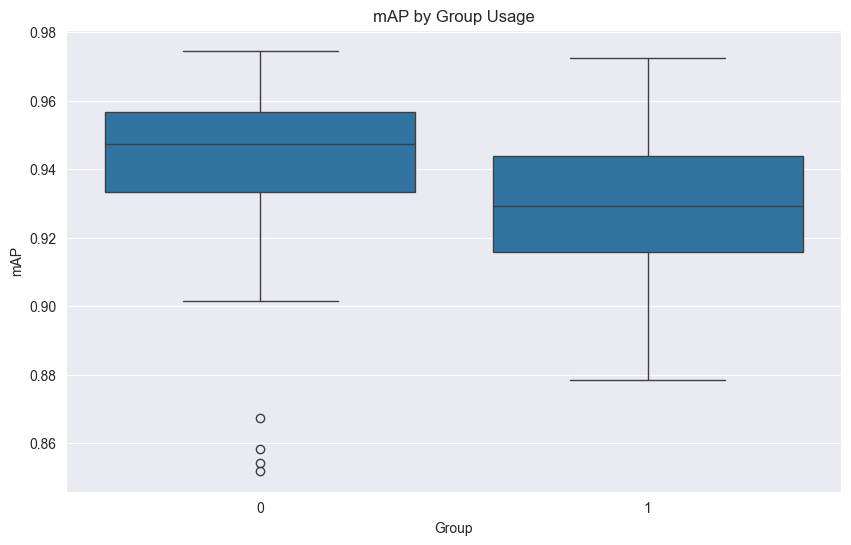

Group     
0      min    0.901492
       max    0.974615
1      min    0.878486
       max    0.972446
Name: mAP, dtype: float64
IQR0 : 0.023479599926254036 IQR1 : 0.027800074355368465
median 0: 0.9454826358909241 median 1: 0.9317472186030085
Normal 클래스 Group별 AP 평균, 0=Group 사용 안함 // 1 = Group 사용함
Group
0    0.980589
1    0.974582
Name: normal_acc, dtype: float64


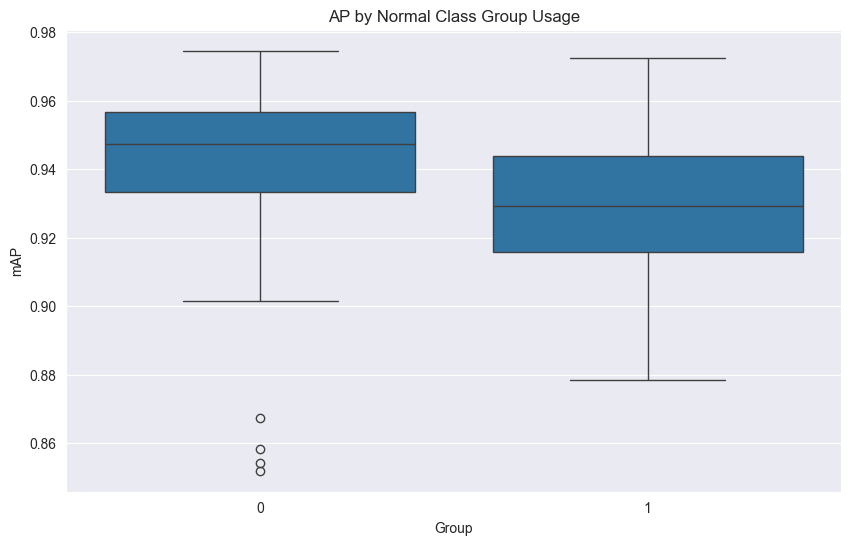

Man-down 클래스 Group별 AP 평균, 0=Group 사용 안함 // 1 = Group 사용함
Group
0    0.927014
1    0.917338
Name: mandown_acc, dtype: float64


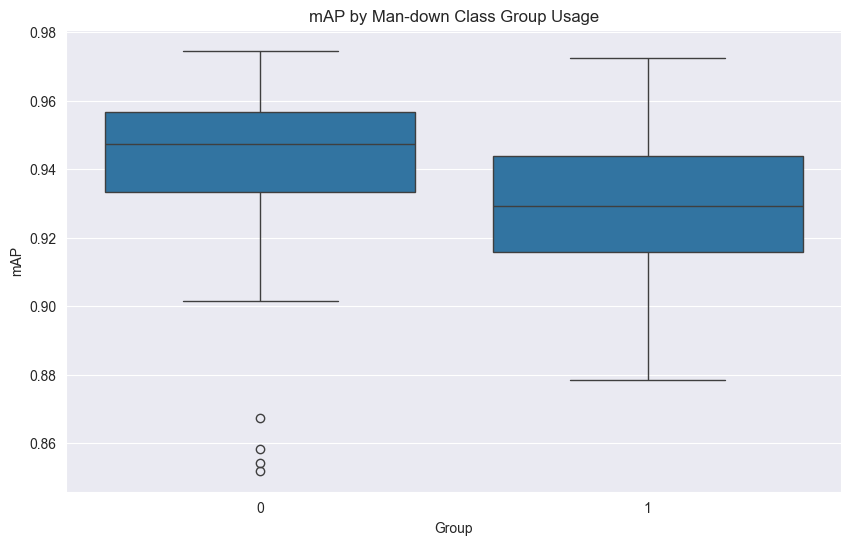

Cross 클래스 Group별 mAP 평균, 0=Group 사용 안함 // 1 = Group 사용함
Group
0    0.922183
1    0.895595
Name: cross_acc, dtype: float64


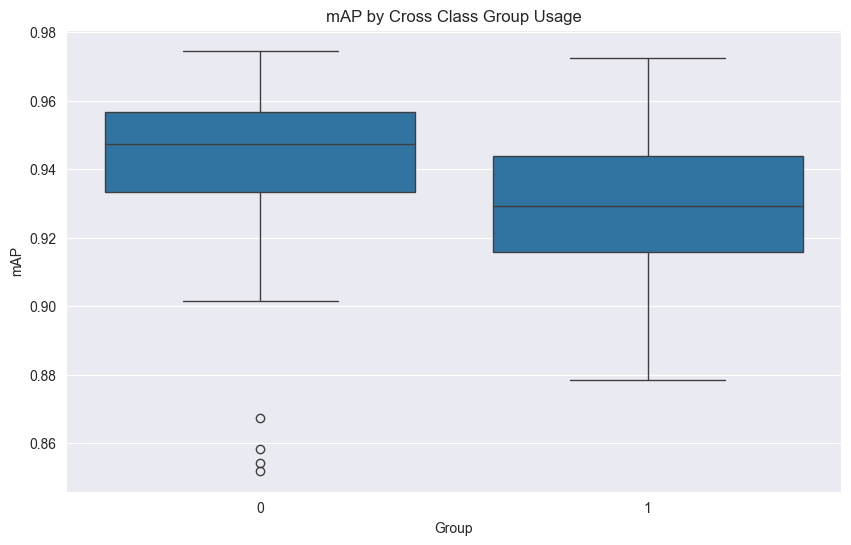

In [26]:
# Group에 따른 mAP 평균 계산
group_Group = df.groupby('Group')['mAP'].mean()
print("Group별 mAP 평균, 0=Group 사용 안함 // 1 = Group 사용함")
print(group_Group)
print('==============================================================================')
# Boxplot으로 mAP 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='mAP', data=df)
plt.title('mAP by Group Usage')
plt.show()

# Function to filter outliers and calculate min, max
def calculate_min_max_without_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group >= lower_bound) & (group <= upper_bound)]
    return pd.Series({'min': filtered_group.min(), 'max': filtered_group.max()})

# IQR 계산 함수
def calculate_iqr(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

# Applying the function to each group (min, max)
min_max_without_outliers = df.groupby('Group')['mAP'].apply(calculate_min_max_without_outliers)
print(min_max_without_outliers)

# Applying the function to each group (IQR)
iqr_0 = calculate_iqr(df[df['Group'] == 0]['mAP'])
iqr_1 = calculate_iqr(df[df['Group'] == 1]['mAP'])
print('IQR0 :', iqr_0 , "IQR1 :", iqr_1)

# Applying the function to each group (median)
median_0 = np.median(df[df['augmented'] == 0]['mAP'])
median_1 = np.median(df[df['augmented'] == 1]['mAP'])
print('median 0:', median_0, 'median 1:', median_1)

# Group에 따른 클래스 별 AP 평균 계산
group_Group = df.groupby('Group')['normal_acc'].mean()
print("Normal 클래스 Group별 AP 평균, 0=Group 사용 안함 // 1 = Group 사용함")
print(group_Group)
print('==============================================================================')
# Boxplot으로 mAP 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='mAP', data=df)
plt.title('AP by Normal Class Group Usage')
plt.show()

group_Group = df.groupby('Group')['mandown_acc'].mean()
print("Man-down 클래스 Group별 AP 평균, 0=Group 사용 안함 // 1 = Group 사용함")
print(group_Group)
print('==============================================================================')
# Boxplot으로 mAP 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='mAP', data=df)
plt.title('mAP by Man-down Class Group Usage')
plt.show()

# Group에 따른 mAP 평균 계산
group_Group = df.groupby('Group')['cross_acc'].mean()
print("Cross 클래스 Group별 mAP 평균, 0=Group 사용 안함 // 1 = Group 사용함")
print(group_Group)
print('==============================================================================')
# Boxplot으로 mAP 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='mAP', data=df)
plt.title('mAP by Cross Class Group Usage')
plt.show()

LSTM별 mAP 평균 0=LSTM 사용 안함 // 1 = LSTM 사용함
LSTM
0    0.935907
1    0.936527
Name: mAP, dtype: float64


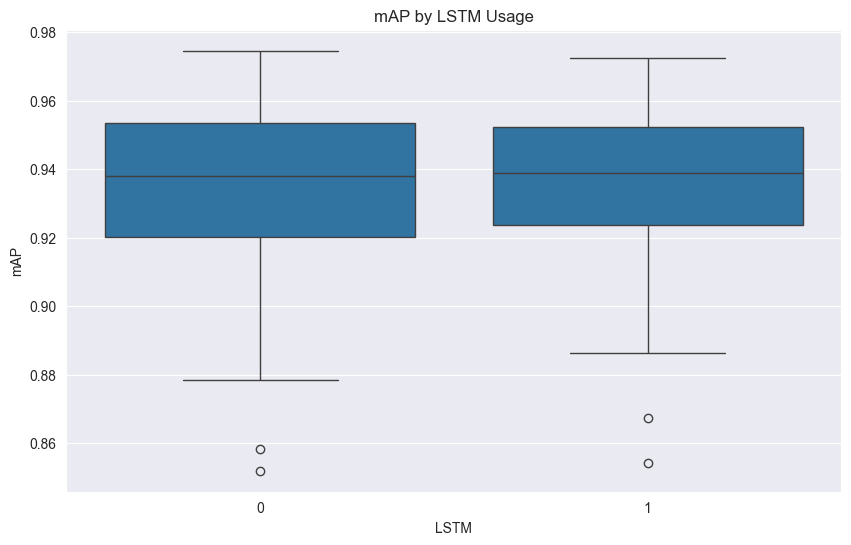

LSTM     
0     min    0.878486
      max    0.974615
1     min    0.886286
      max    0.972521
Name: mAP, dtype: float64
IQR0 : 0.03321064485553504 IQR1 : 0.028571291353498562
median 0: 0.9380102758242825 median 1: 0.9388185067701886
Normal 클래스 LSTM별 AP 평균, 0=LSTM 사용 안함 // 1 = LSTM 사용함
LSTM
0    0.975742
1    0.979428
Name: normal_acc, dtype: float64


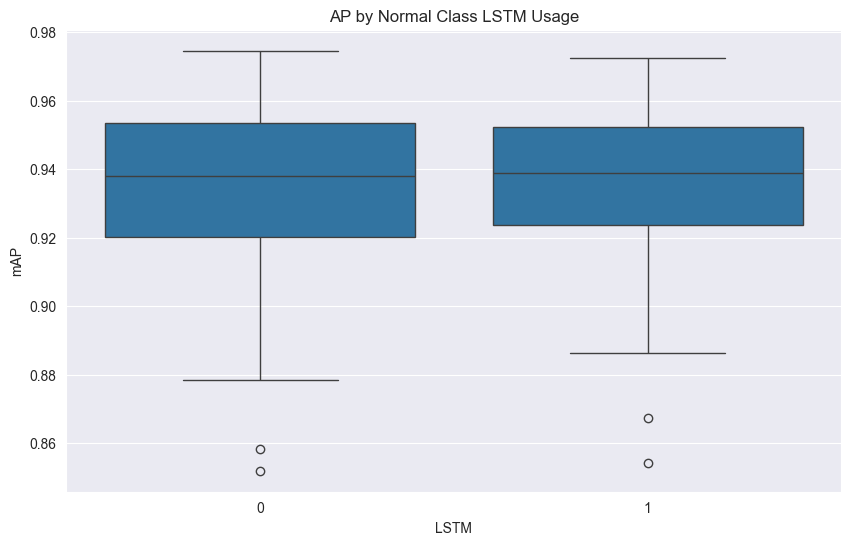

Man-down 클래스 LSTM별 AP 평균, 0=LSTM 사용 안함 // 1 = LSTM 사용함
LSTM
0    0.921407
1    0.922945
Name: mandown_acc, dtype: float64


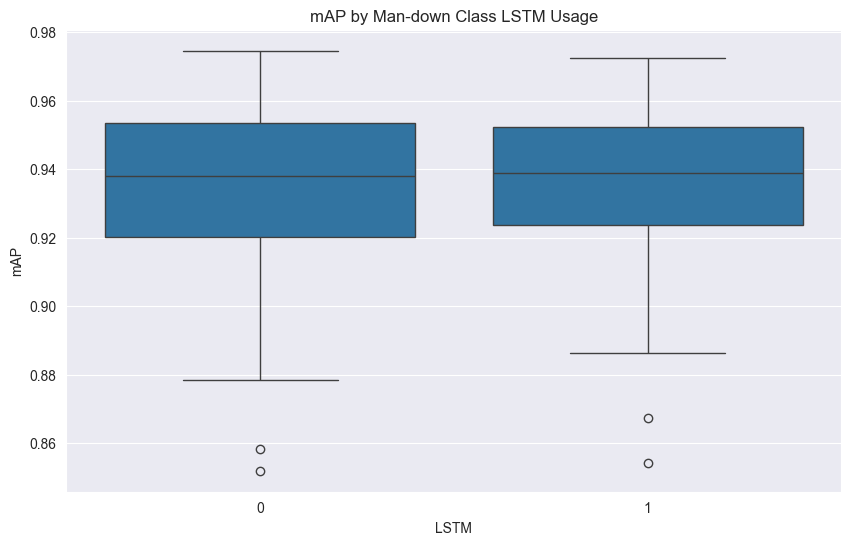

Cross 클래스 LSTM별 mAP 평균, 0=LSTM 사용 안함 // 1 = LSTM 사용함
LSTM
0    0.910570
1    0.907208
Name: cross_acc, dtype: float64


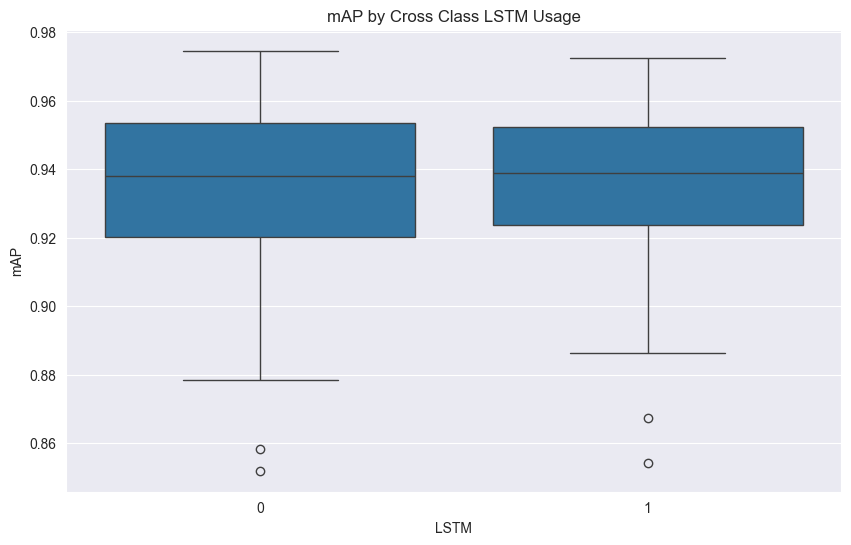

In [27]:
# LSTM에 따른 mAP 평균 계산
LSTM_Group = df.groupby('LSTM')['mAP'].mean()
print("LSTM별 mAP 평균", "0=LSTM 사용 안함 // 1 = LSTM 사용함")
print(LSTM_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='LSTM', y='mAP', data=df)
plt.title('mAP by LSTM Usage')
plt.show()

# Function to filter outliers and calculate min, max
def calculate_min_max_without_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group >= lower_bound) & (group <= upper_bound)]
    return pd.Series({'min': filtered_group.min(), 'max': filtered_group.max()})

# IQR 계산 함수
def calculate_iqr(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

# Applying the function to each group (min, max)
min_max_without_outliers = df.groupby('LSTM')['mAP'].apply(calculate_min_max_without_outliers)
print(min_max_without_outliers)

# Applying the function to each group (IQR)
iqr_0 = calculate_iqr(df[df['LSTM'] == 0]['mAP'])
iqr_1 = calculate_iqr(df[df['LSTM'] == 1]['mAP'])
print('IQR0 :', iqr_0 , "IQR1 :", iqr_1)

# Applying the function to each group (median)
median_0 = np.median(df[df['LSTM'] == 0]['mAP'])
median_1 = np.median(df[df['LSTM'] == 1]['mAP'])
print('median 0:', median_0, 'median 1:', median_1)




# LSTM에 따른 클래스 별 AP 평균 계산
LSTM_Group = df.groupby('LSTM')['normal_acc'].mean()
print("Normal 클래스 LSTM별 AP 평균, 0=LSTM 사용 안함 // 1 = LSTM 사용함")
print(LSTM_Group)
print('==============================================================================')
# Boxplot으로 mAP 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='LSTM', y='mAP', data=df)
plt.title('AP by Normal Class LSTM Usage')
plt.show()

LSTM_Group = df.groupby('LSTM')['mandown_acc'].mean()
print("Man-down 클래스 LSTM별 AP 평균, 0=LSTM 사용 안함 // 1 = LSTM 사용함")
print(LSTM_Group)
print('==============================================================================')
# Boxplot으로 mAP 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='LSTM', y='mAP', data=df)
plt.title('mAP by Man-down Class LSTM Usage')
plt.show()

LSTM_Group = df.groupby('LSTM')['cross_acc'].mean()
print("Cross 클래스 LSTM별 mAP 평균, 0=LSTM 사용 안함 // 1 = LSTM 사용함")
print(LSTM_Group)
print('==============================================================================')
# Boxplot으로 mAP 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='LSTM', y='mAP', data=df)
plt.title('mAP by Cross Class LSTM Usage')
plt.show()

augmented별 mAP 평균 0=augmented 사용 안함 // 1 = augmented 사용함
augmented
0    0.941523
1    0.930911
Name: mAP, dtype: float64


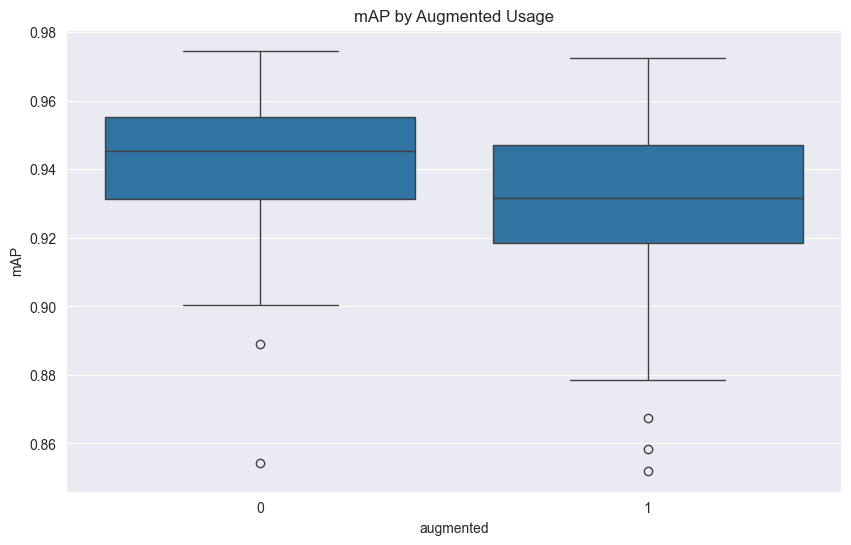

augmented     
0          min    0.900342
           max    0.974615
1          min    0.878486
           max    0.972521
Name: mAP, dtype: float64
IQR0 : 0.024072992112703084 IQR1 : 0.028513358465067307
Normal 클래스 augmented별 AP 평균 0=augmented 사용 안함 // 1 = augmented 사용함
augmented
0    0.979063
1    0.976107
Name: normal_acc, dtype: float64


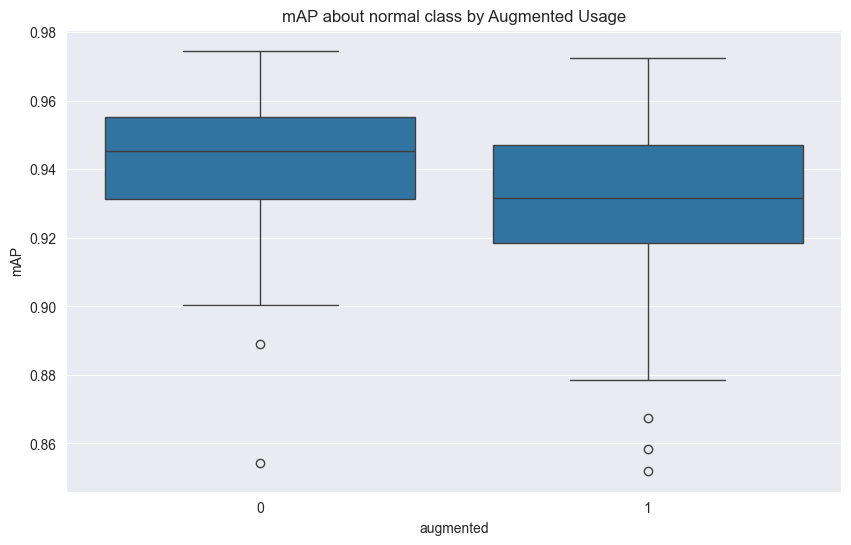

Man-down 클래스 augmented AP 평균 0=augmented 사용 안함 // 1 = augmented 사용함
augmented
0    0.926685
1    0.917667
Name: mandown_acc, dtype: float64


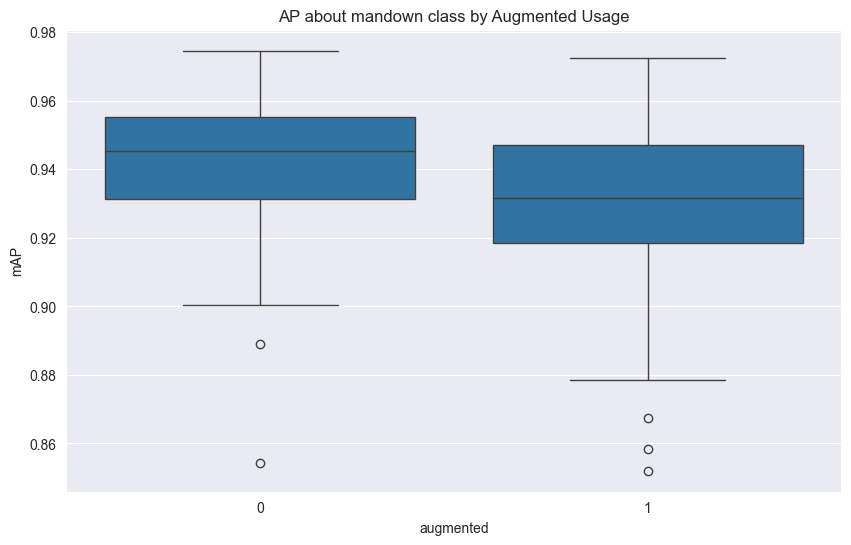

Cross 클래스 augmented별 AP 평균 0=augmented 사용 안함 // 1 = augmented 사용함
augmented
0    0.918820
1    0.898958
Name: cross_acc, dtype: float64


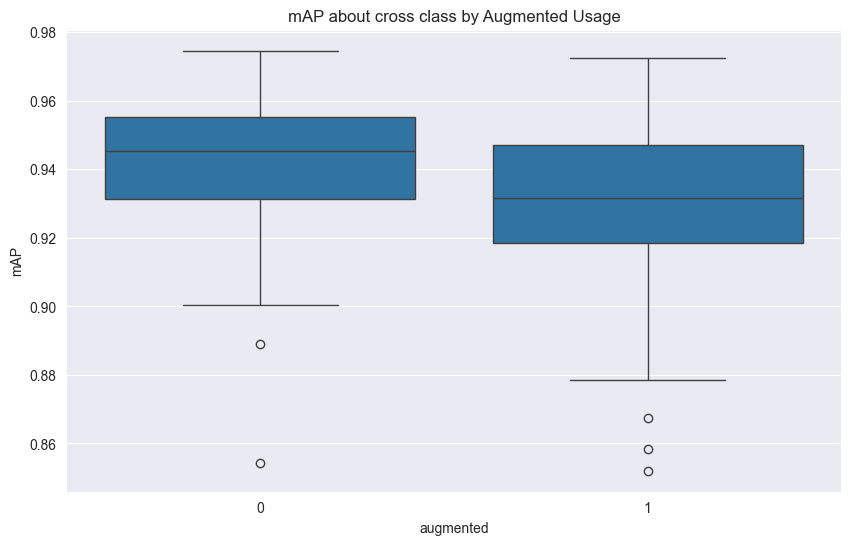

In [28]:
# augmented에 따른 mAP 평균 계산
augmented_Group = df.groupby('augmented')['mAP'].mean()
print("augmented별 mAP 평균", "0=augmented 사용 안함 // 1 = augmented 사용함")
print(augmented_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='augmented', y='mAP', data=df)
plt.title('mAP by Augmented Usage')
plt.show()

# Function to filter outliers and calculate min, max
def calculate_min_max_without_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group >= lower_bound) & (group <= upper_bound)]
    return pd.Series({'min': filtered_group.min(), 'max': filtered_group.max()})

# IQR 계산 함수
def calculate_iqr(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

# Applying the function to each group (min, max)
min_max_without_outliers = df.groupby('augmented')['mAP'].apply(calculate_min_max_without_outliers)
print(min_max_without_outliers)

# Applying the function to each group (IQR)
iqr_0 = calculate_iqr(df[df['augmented'] == 0]['mAP'])
iqr_1 = calculate_iqr(df[df['augmented'] == 1]['mAP'])
print('IQR0 :', iqr_0 , "IQR1 :", iqr_1)

# augmented에 따른 normal category의 mAP 평균 계산
augmented_Group = df.groupby('augmented')['normal_acc'].mean()
print("Normal 클래스 augmented별 AP 평균", "0=augmented 사용 안함 // 1 = augmented 사용함")
print(augmented_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='augmented', y='mAP', data=df)
plt.title('mAP about normal class by Augmented Usage')
plt.show()

# augmented에 따른 mandown category의 mAP 평균 계산
augmented_Group = df.groupby('augmented')['mandown_acc'].mean()
print("Man-down 클래스 augmented AP 평균", "0=augmented 사용 안함 // 1 = augmented 사용함")
print(augmented_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='augmented', y='mAP', data=df)
plt.title('AP about mandown class by Augmented Usage')
plt.show()

# augmented에 따른 cross category의 mAP 평균 계산
augmented_Group = df.groupby('augmented')['cross_acc'].mean()
print("Cross 클래스 augmented별 AP 평균", "0=augmented 사용 안함 // 1 = augmented 사용함")
print(augmented_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='augmented', y='mAP', data=df)
plt.title('mAP about cross class by Augmented Usage')
plt.show()

conv별 mAP 평균
conv
1    0.932955
2    0.936783
3    0.933348
4    0.932892
5    0.939115
6    0.942207
Name: mAP, dtype: float64


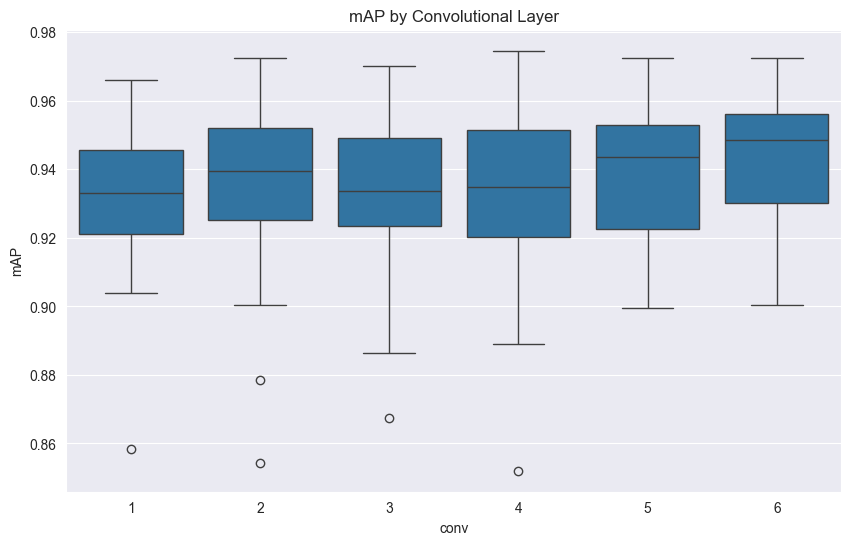

conv     
1     min    0.903866
      max    0.966035
2     min    0.900342
      max    0.972397
3     min    0.886286
      max    0.970133
4     min    0.888881
      max    0.974615
5     min    0.899463
      max    0.972521
6     min    0.900532
      max    0.972446
Name: mAP, dtype: float64
IQR_1 : 0.024446619087371224
IQR_2 : 0.02696718423813882
IQR_3 : 0.025887776037188837
IQR_4 : 0.031303981788200264
IQR_5 : 0.030281027896679524
IQR_6 : 0.026029444684955383
median_1 : 0.9329803345097227
median_2 : 0.9395129317998394
median_3 : 0.9336625166495536
median_4 : 0.934829596595651
median_5 : 0.9436491435998846
median_6 : 0.9484920252007238
Normal 클래스 conv별 AP 평균
conv
1    0.977540
2    0.977858
3    0.977324
4    0.975664
5    0.976901
6    0.980224
Name: normal_acc, dtype: float64


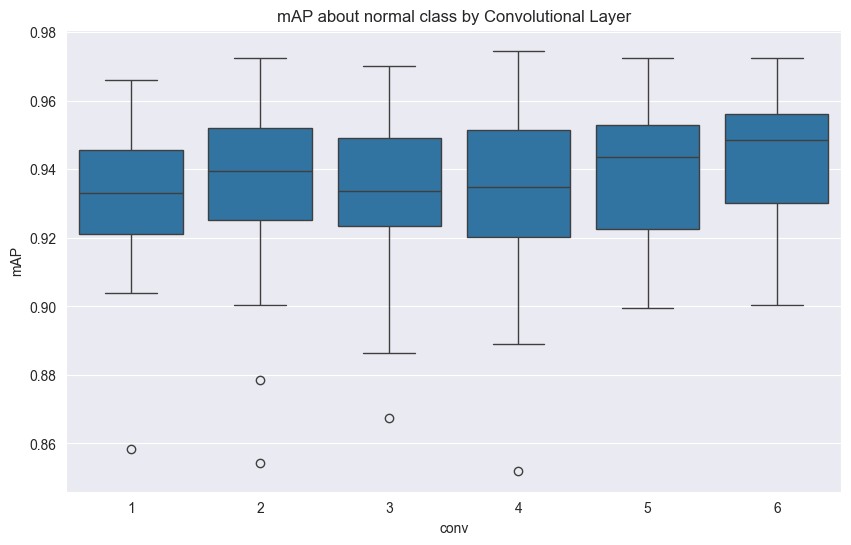

Man-down 클래스 conv별 AP 평균
conv
1    0.919316
2    0.922322
3    0.918870
4    0.919447
5    0.925328
6    0.927773
Name: mandown_acc, dtype: float64


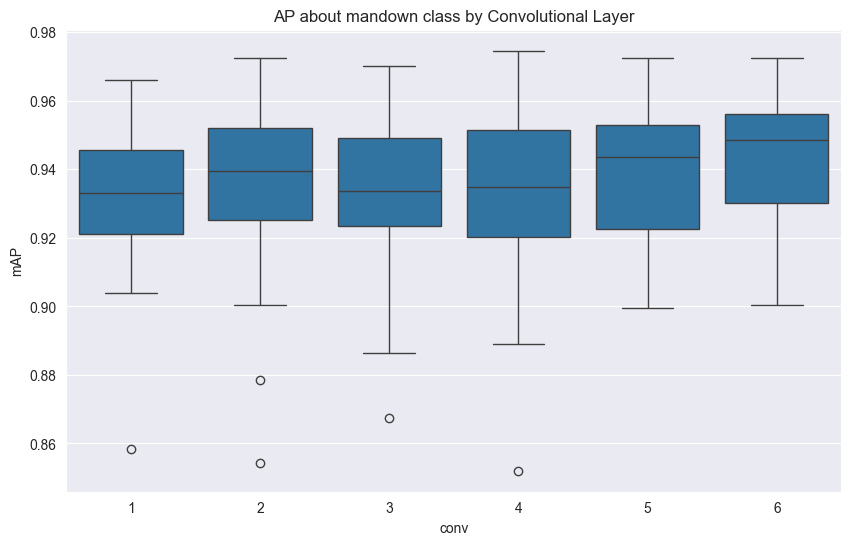

Cross 클래스 conv별 AP 평균
conv
1    0.902010
2    0.910169
3    0.903850
4    0.903566
5    0.915115
6    0.918625
Name: cross_acc, dtype: float64


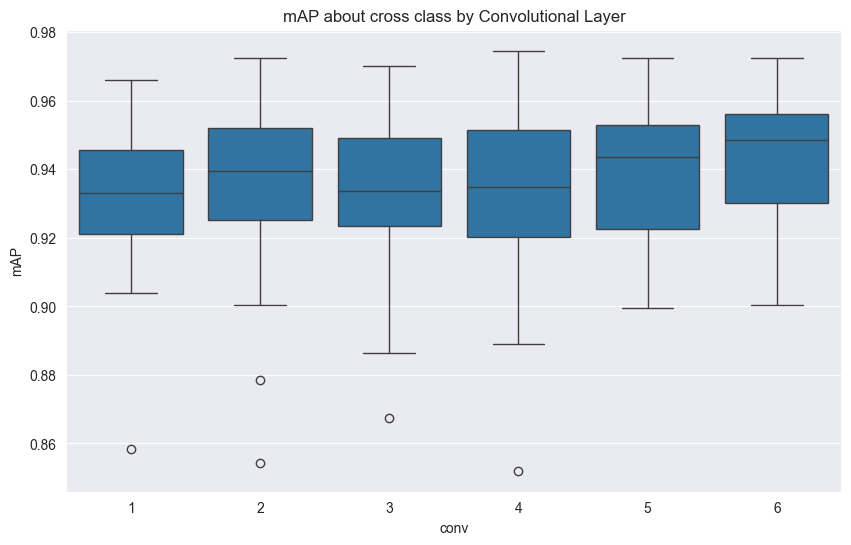

In [29]:
# conv에 따른 mAP 평균 계산
conv_Group = df.groupby('conv')['mAP'].mean()
print("conv별 mAP 평균")
print(conv_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='conv', y='mAP', data=df)
plt.title('mAP by Convolutional Layer')
plt.show()

# Function to filter outliers and calculate min, max
def calculate_min_max_without_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group >= lower_bound) & (group <= upper_bound)]
    return pd.Series({'min': filtered_group.min(), 'max': filtered_group.max()})

# IQR 계산 함수
def calculate_iqr(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

# Applying the function to each group (min, max)
min_max_without_outliers = df.groupby('conv')['mAP'].apply(calculate_min_max_without_outliers)
print(min_max_without_outliers)

# Applying the function to each group (IQR)
iqr = []
iqr.append(calculate_iqr(df[df['conv'] == 1]['mAP']))
iqr.append(calculate_iqr(df[df['conv'] == 2]['mAP']))
iqr.append(calculate_iqr(df[df['conv'] == 3]['mAP']))
iqr.append(calculate_iqr(df[df['conv'] == 4]['mAP']))
iqr.append(calculate_iqr(df[df['conv'] == 5]['mAP']))
iqr.append(calculate_iqr(df[df['conv'] == 6]['mAP']))
for i in range(6):
    print(f'IQR_{i+1} :', iqr[i])

# Applying the function to each group (median)
median = []
median.append(np.median(df[df['conv'] == 1]['mAP']))
median.append(np.median(df[df['conv'] == 2]['mAP']))
median.append(np.median(df[df['conv'] == 3]['mAP']))
median.append(np.median(df[df['conv'] == 4]['mAP']))
median.append(np.median(df[df['conv'] == 5]['mAP']))
median.append(np.median(df[df['conv'] == 6]['mAP']))
for i in range(6):
    print(f'median_{i+1} :', median[i])



# conv에 따른 normal category의 mAP 평균 계산
conv_Group = df.groupby('conv')['normal_acc'].mean()
print("Normal 클래스 conv별 AP 평균")
print(conv_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='conv', y='mAP', data=df)
plt.title('mAP about normal class by Convolutional Layer')
plt.show()

# conv에 따른 mandown category의 mAP 평균 계산
conv_Group = df.groupby('conv')['mandown_acc'].mean()
print("Man-down 클래스 conv별 AP 평균")
print(conv_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='conv', y='mAP', data=df)
plt.title('AP about mandown class by Convolutional Layer')
plt.show()

# conv에 따른 cross category의 mAP 평균 계산
conv_Group = df.groupby('conv')['cross_acc'].mean()
print("Cross 클래스 conv별 AP 평균")
print(conv_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='conv', y='mAP', data=df)
plt.title('mAP about cross class by Convolutional Layer')
plt.show()

frame별 mAP 평균
frame
1     0.922912
3     0.953706
5     0.943909
7     0.936911
9     0.934367
11    0.925496
Name: mAP, dtype: float64


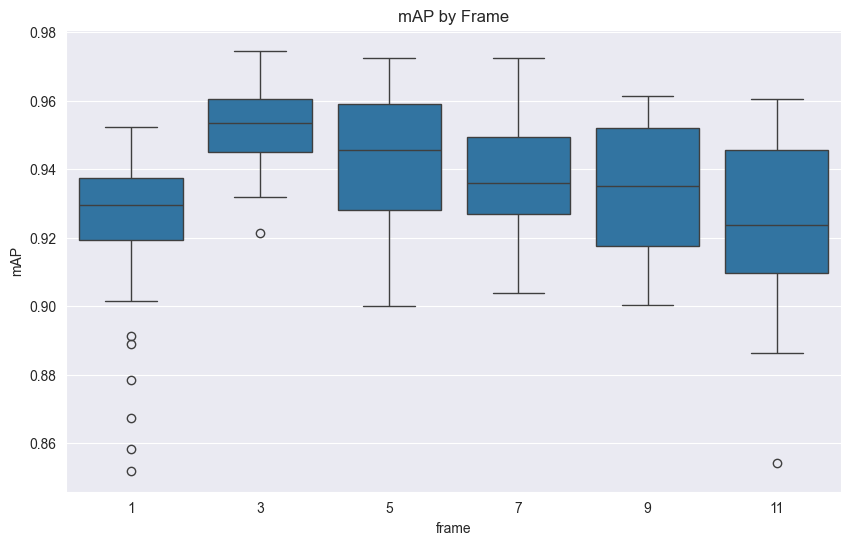

Normal 클래스 frame별 AP 평균
frame
1     0.954769
3     0.980489
5     0.988090
7     0.982822
9     0.983568
11    0.975773
Name: normal_acc, dtype: float64


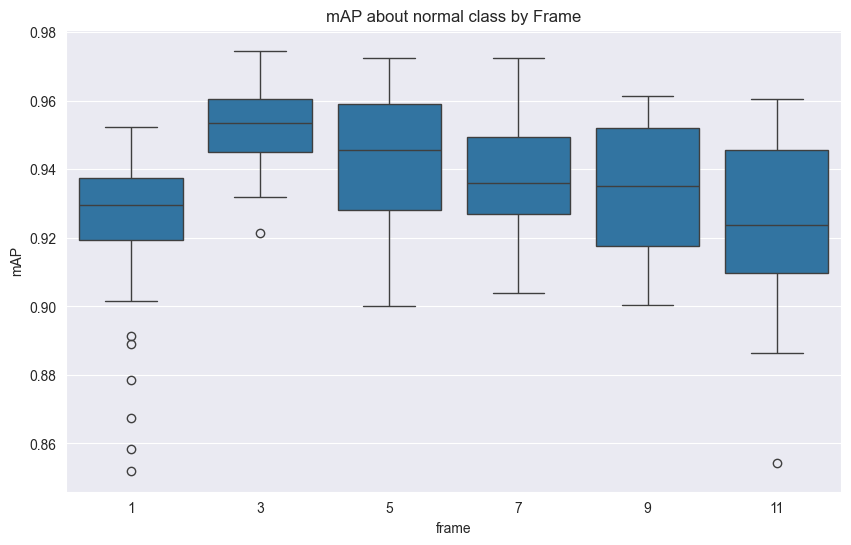

Man-down 클래스 frame별 AP 평균
frame
1     0.913298
3     0.934402
5     0.930566
7     0.920983
9     0.917492
11    0.916316
Name: mandown_acc, dtype: float64


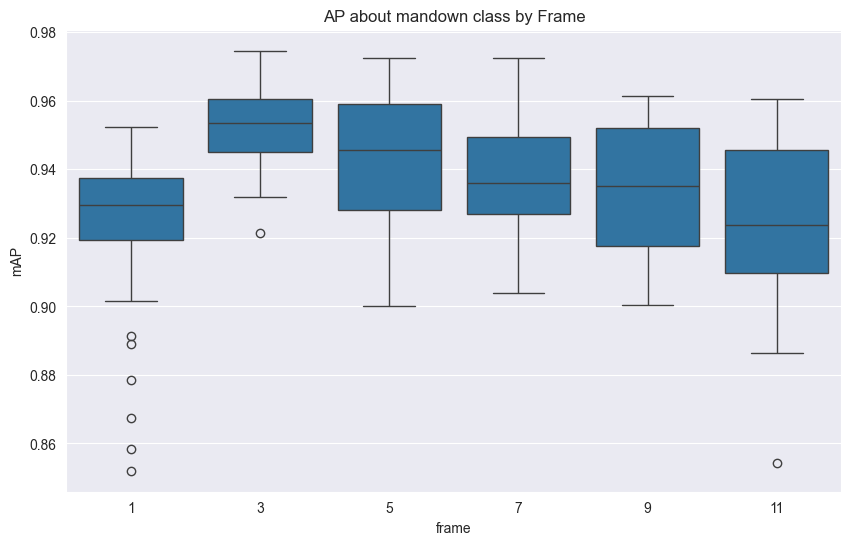

Cross 클래스 frame별 AP 평균
frame
1     0.900669
3     0.946228
5     0.913072
7     0.906927
9     0.902041
11    0.884397
Name: cross_acc, dtype: float64


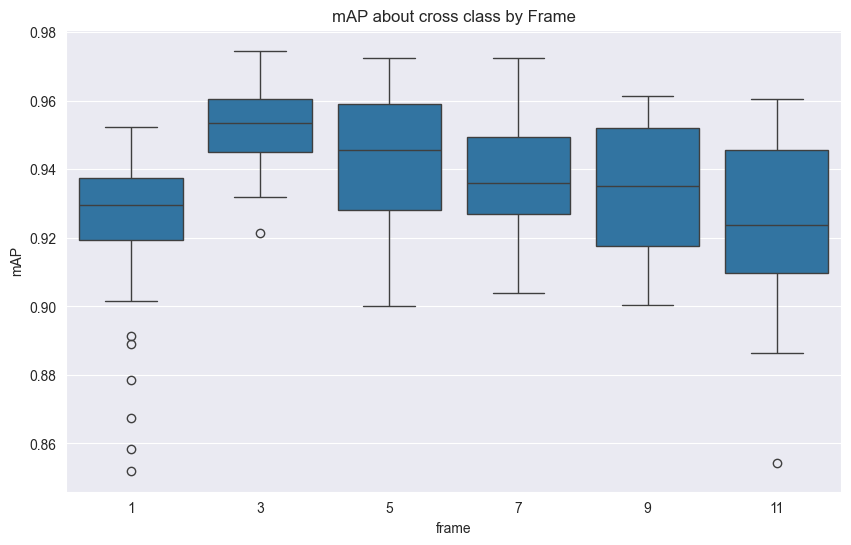

In [30]:
# frame에 따른 mAP 평균 계산
frame_Group = df.groupby('frame')['mAP'].mean()
print("frame별 mAP 평균")
print(frame_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='frame', y='mAP', data=df)
plt.title('mAP by Frame')
plt.show()

# frame에 따른 normal category의 mAP 평균 계산
frame_Group = df.groupby('frame')['normal_acc'].mean()
print("Normal 클래스 frame별 AP 평균")
print(frame_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='frame', y='mAP', data=df)
plt.title('mAP about normal class by Frame')
plt.show()

# frame에 따른 mandown category의 mAP 평균 계산
frame_Group = df.groupby('frame')['mandown_acc'].mean()
print("Man-down 클래스 frame별 AP 평균")
print(frame_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='frame', y='mAP', data=df)
plt.title('AP about mandown class by Frame')
plt.show()

# frame에 따른 cross category의 mAP 평균 계산
frame_Group = df.groupby('frame')['cross_acc'].mean()
print("Cross 클래스 frame별 AP 평균")
print(frame_Group)
print('==============================================================================')
plt.figure(figsize=(10, 6))
sns.boxplot(x='frame', y='mAP', data=df)
plt.title('mAP about cross class by Frame')
plt.show()

ece_group_Group
Group
0    0.062157
1    0.066812
Name: ECE, dtype: float64


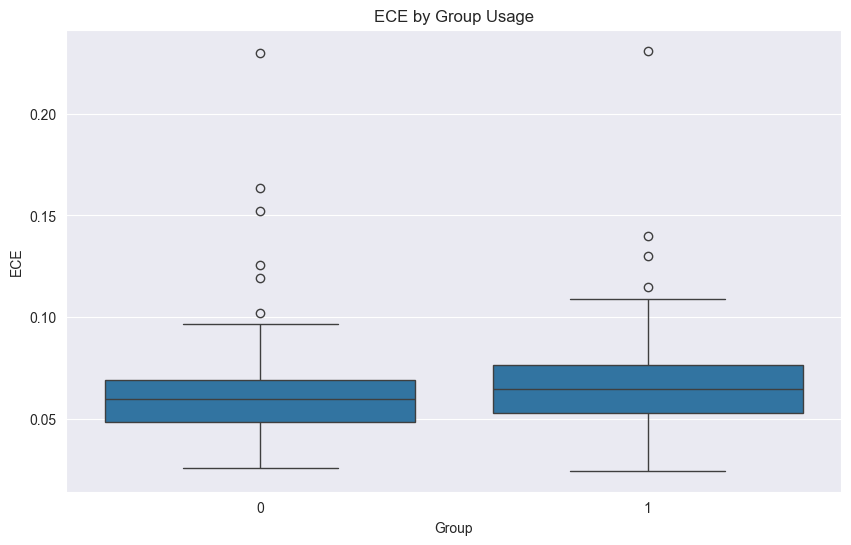

Group     
0      min    0.025590
       max    0.096641
1      min    0.024404
       max    0.108660
Name: ECE, dtype: float64
IQR0 : 0.020982585249587432 IQR1 : 0.023274273303568356
median 0: 0.06073082032924105 median 1: 0.0629207297811267


In [31]:
# Group by group usage and calculate mean ECE
ece_group_Group = df.groupby('Group')['ECE'].mean()
print("ece_group_Group")
print(ece_group_Group)
print('==============================================================================')
# Boxplot of mAP by Group usage
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='ECE', data=df)
plt.title('ECE by Group Usage')
plt.show()

# Function to filter outliers and calculate min, max
def calculate_min_max_without_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group >= lower_bound) & (group <= upper_bound)]
    return pd.Series({'min': filtered_group.min(), 'max': filtered_group.max()})

# IQR 계산 함수
def calculate_iqr(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

# Applying the function to each group (min, max)
min_max_without_outliers = df.groupby('Group')['ECE'].apply(calculate_min_max_without_outliers)
print(min_max_without_outliers)

# Applying the function to each group (IQR)
iqr_0 = calculate_iqr(df[df['Group'] == 0]['ECE'])
iqr_1 = calculate_iqr(df[df['Group'] == 1]['ECE'])
print('IQR0 :', iqr_0 , "IQR1 :", iqr_1)

# Applying the function to each group (median)
median_0 = np.median(df[df['augmented'] == 0]['ECE'])
median_1 = np.median(df[df['augmented'] == 1]['ECE'])
print('median 0:', median_0, 'median 1:', median_1)

ece_LSTM_Group
LSTM
0    0.06276
1    0.06621
Name: ECE, dtype: float64


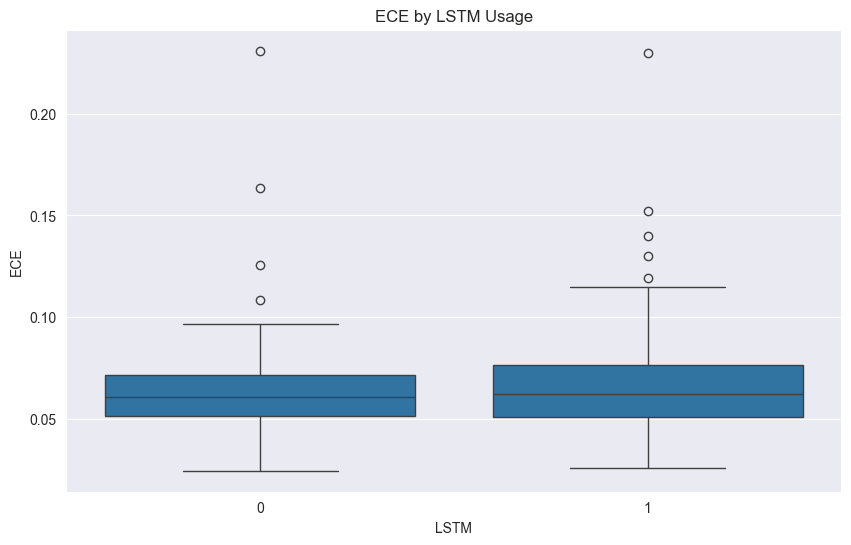

LSTM     
0     min    0.024404
      max    0.096641
1     min    0.025590
      max    0.114895
Name: ECE, dtype: float64
IQR0 : 0.020239583952869455 IQR1 : 0.02568354849653723
median 0: 0.0606307841511767 median 1: 0.06237123472506095


In [32]:
# Group by LSTM usage and calculate mean ECE
ece_LSTM_Group = df.groupby('LSTM')['ECE'].mean()
print("ece_LSTM_Group")
print(ece_LSTM_Group)
print('==============================================================================')
# Boxplot of mAP by LSTM usage
plt.figure(figsize=(10, 6))
sns.boxplot(x='LSTM', y='ECE', data=df)
plt.title('ECE by LSTM Usage')
plt.show()

# Function to filter outliers and calculate min, max
def calculate_min_max_without_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group >= lower_bound) & (group <= upper_bound)]
    return pd.Series({'min': filtered_group.min(), 'max': filtered_group.max()})

# IQR 계산 함수
def calculate_iqr(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

# Applying the function to each group (min, max)
min_max_without_outliers = df.groupby('LSTM')['ECE'].apply(calculate_min_max_without_outliers)
print(min_max_without_outliers)

# Applying the function to each group (IQR)
iqr_0 = calculate_iqr(df[df['LSTM'] == 0]['ECE'])
iqr_1 = calculate_iqr(df[df['LSTM'] == 1]['ECE'])
print('IQR0 :', iqr_0 , "IQR1 :", iqr_1)

# Applying the function to each group (median)
median_0 = np.median(df[df['LSTM'] == 0]['ECE'])
median_1 = np.median(df[df['LSTM'] == 1]['ECE'])
print('median 0:', median_0, 'median 1:', median_1)

ece_augmented_Group
augmented
0    0.062083
1    0.066886
Name: ECE, dtype: float64


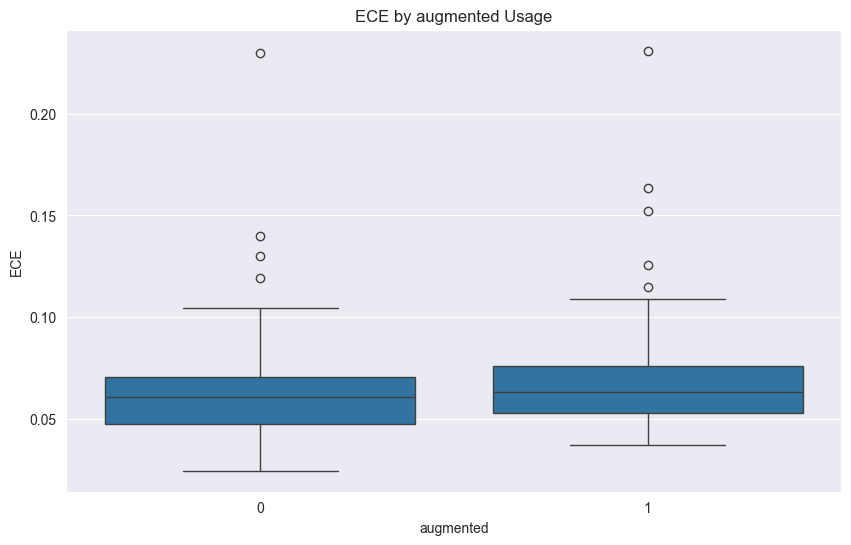

augmented     
0          min    0.024404
           max    0.104373
1          min    0.037201
           max    0.108660
Name: ECE, dtype: float64
IQR0 : 0.022990100114552603 IQR1 : 0.02275346681702528
median 0: 0.06073082032924105 median 1: 0.0629207297811267


In [33]:
# Group by augmented usage and calculate mean ECE
ece_augmented_Group = df.groupby('augmented')['ECE'].mean()
print("ece_augmented_Group")
print(ece_augmented_Group)
print('==============================================================================')
# Boxplot of mAP by augmented usage
plt.figure(figsize=(10, 6))
sns.boxplot(x='augmented', y='ECE', data=df)
plt.title('ECE by augmented Usage')
plt.show()

# Function to filter outliers and calculate min, max
def calculate_min_max_without_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group >= lower_bound) & (group <= upper_bound)]
    return pd.Series({'min': filtered_group.min(), 'max': filtered_group.max()})

# IQR 계산 함수
def calculate_iqr(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

# Applying the function to each group (min, max)
min_max_without_outliers = df.groupby('augmented')['ECE'].apply(calculate_min_max_without_outliers)
print(min_max_without_outliers)

# Applying the function to each group (IQR)
iqr_0 = calculate_iqr(df[df['augmented'] == 0]['ECE'])
iqr_1 = calculate_iqr(df[df['augmented'] == 1]['ECE'])
print('IQR0 :', iqr_0 , "IQR1 :", iqr_1)

# Applying the function to each group (median)
median_0 = np.median(df[df['augmented'] == 0]['ECE'])
median_1 = np.median(df[df['augmented'] == 1]['ECE'])
print('median 0:', median_0, 'median 1:', median_1)

ece_conv_Group
conv
1    0.062332
2    0.065909
3    0.063779
4    0.068960
5    0.064174
6    0.061755
Name: ECE, dtype: float64


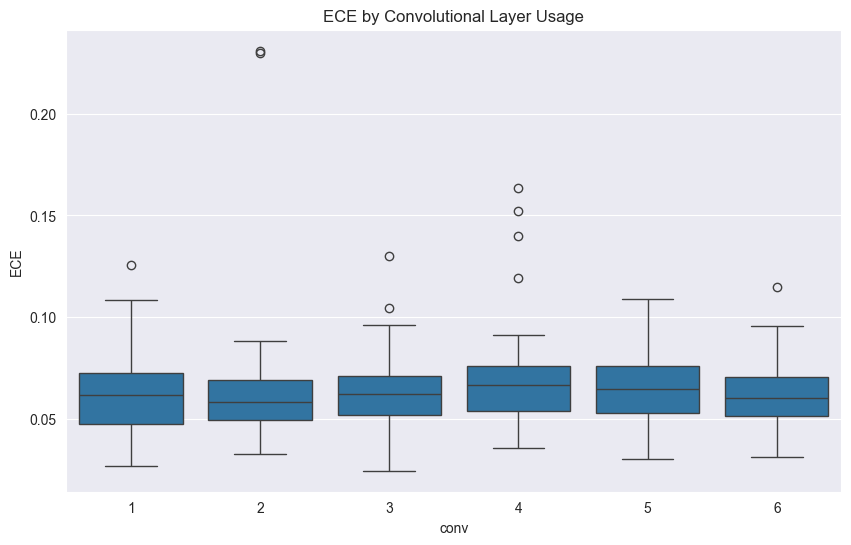

conv     
1     min    0.026515
      max    0.108465
2     min    0.032799
      max    0.088143
3     min    0.024404
      max    0.096040
4     min    0.035459
      max    0.090978
5     min    0.030040
      max    0.108660
6     min    0.031387
      max    0.095591
Name: ECE, dtype: float64
IQR_1 : 0.02520997710298195
IQR_2 : 0.01942807758833038
IQR_3 : 0.019100630237839047
IQR_4 : 0.021992852375476997
IQR_5 : 0.023523572865991396
IQR_6 : 0.01901128038750151
median_1 : 0.0617749751362104
median_2 : 0.05829286359469035
median_3 : 0.062247341471712694
median_4 : 0.0667367822645739
median_5 : 0.06476844595429104
median_6 : 0.06004380016277275


In [34]:
# Group by conv and calculate mean ECE
ece_conv_Group = df.groupby('conv')['ECE'].mean()
print("ece_conv_Group")
print(ece_conv_Group)
print('==============================================================================')
# Boxplot of mAP by conv
plt.figure(figsize=(10, 6))
sns.boxplot(x='conv', y='ECE', data=df)
plt.title('ECE by Convolutional Layer Usage')
plt.show()

# Function to filter outliers and calculate min, max
def calculate_min_max_without_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group >= lower_bound) & (group <= upper_bound)]
    return pd.Series({'min': filtered_group.min(), 'max': filtered_group.max()})

# IQR 계산 함수
def calculate_iqr(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

# Applying the function to each group (min, max)
min_max_without_outliers = df.groupby('conv')['ECE'].apply(calculate_min_max_without_outliers)
print(min_max_without_outliers)

# Applying the function to each group (IQR)
iqr = []
iqr.append(calculate_iqr(df[df['conv'] == 1]['ECE']))
iqr.append(calculate_iqr(df[df['conv'] == 2]['ECE']))
iqr.append(calculate_iqr(df[df['conv'] == 3]['ECE']))
iqr.append(calculate_iqr(df[df['conv'] == 4]['ECE']))
iqr.append(calculate_iqr(df[df['conv'] == 5]['ECE']))
iqr.append(calculate_iqr(df[df['conv'] == 6]['ECE']))
for i in range(6):
    print(f'IQR_{i+1} :', iqr[i])

# Applying the function to each group (median)
median = []
median.append(np.median(df[df['conv'] == 1]['ECE']))
median.append(np.median(df[df['conv'] == 2]['ECE']))
median.append(np.median(df[df['conv'] == 3]['ECE']))
median.append(np.median(df[df['conv'] == 4]['ECE']))
median.append(np.median(df[df['conv'] == 5]['ECE']))
median.append(np.median(df[df['conv'] == 6]['ECE']))
for i in range(6):
    print(f'median_{i+1} :', median[i])

ece_frame_Group
frame
1     0.066252
3     0.049190
5     0.052904
7     0.066357
9     0.072193
11    0.080013
Name: ECE, dtype: float64


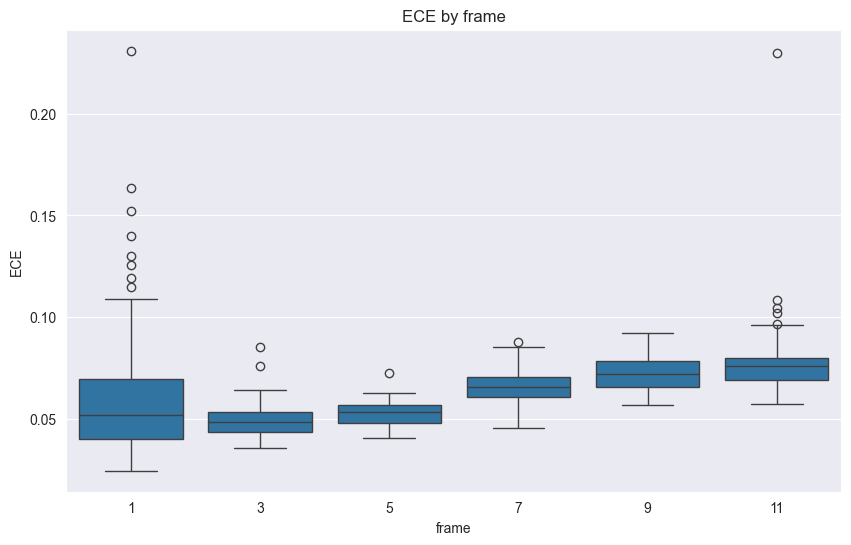

In [35]:
# Group by frame and calculate mean ECE
ece_frame_Group = df.groupby('frame')['ECE'].mean()
print("ece_frame_Group")
print(ece_frame_Group)
print('==============================================================================')
# Boxplot of mAP by frame
plt.figure(figsize=(10, 6))
sns.boxplot(x='frame', y='ECE', data=df)
plt.title('ECE by frame')
plt.show()

Correlation between Original ECE and Plat scaling ECE: 0.1354
Correlation between Original ECE and Isotonic regression ECE: 0.4343


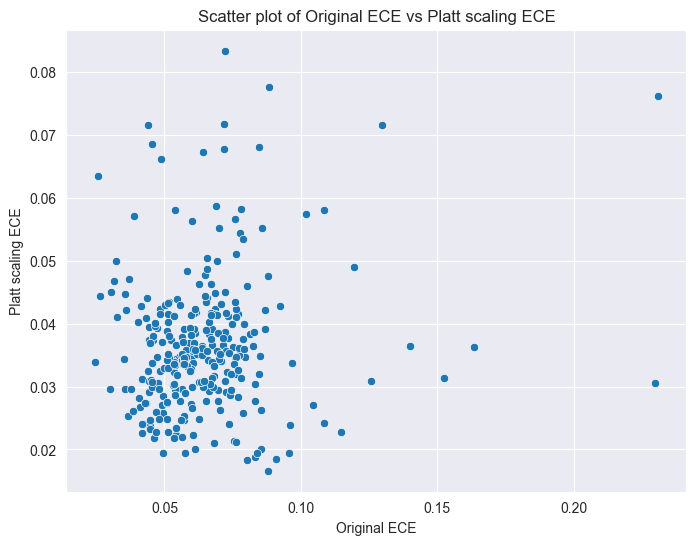

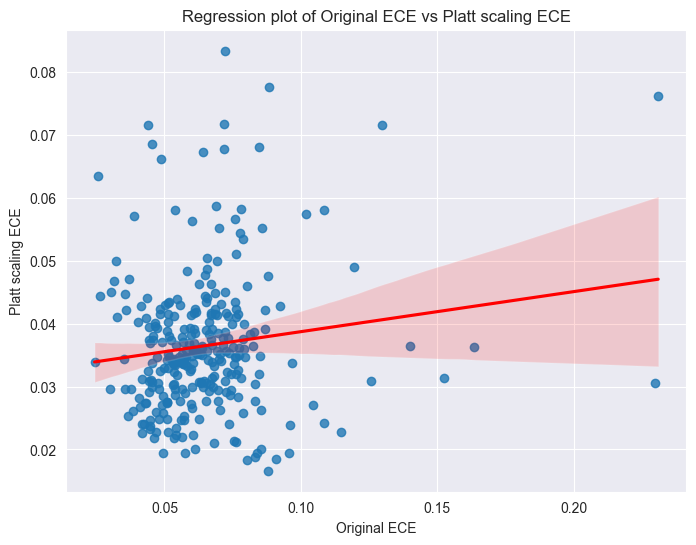

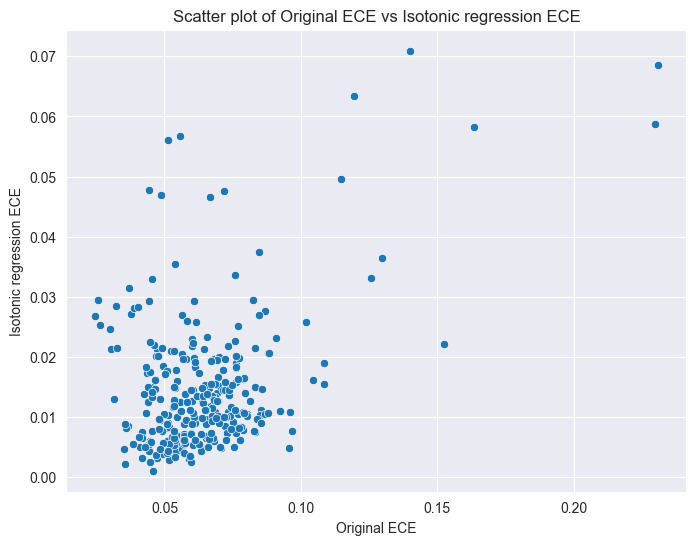

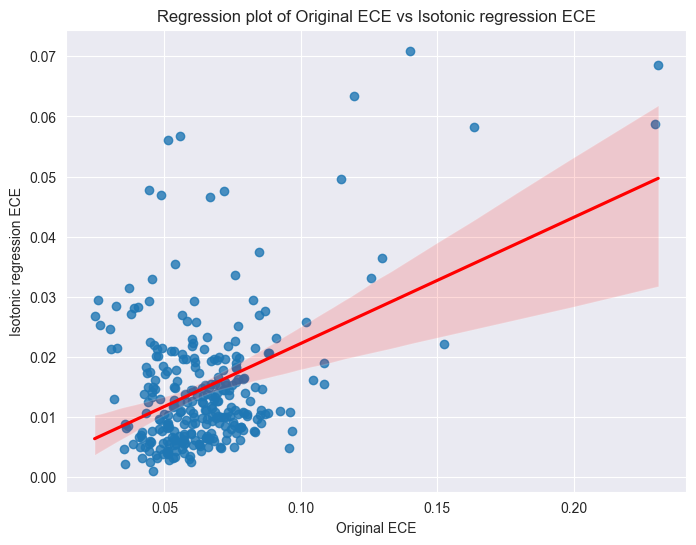

In [36]:
file_path = 'ece_comparison.csv'
df = pd.read_csv(file_path)

# 상관계수 계산
correlation1 = df['Original_ECE'].corr(df['Platt_scaling_ECE'])
print(f'Correlation between Original ECE and Plat scaling ECE: {correlation1:.4f}')
correlation2 = df['Original_ECE'].corr(df['Isotonic_regression_ECE'])
print(f'Correlation between Original ECE and Isotonic regression ECE: {correlation2:.4f}')


# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Original_ECE', y='Platt_scaling_ECE', data=df)
plt.title('Scatter plot of Original ECE vs Platt scaling ECE')
plt.xlabel('Original ECE')
plt.ylabel('Platt scaling ECE')
plt.grid(True)
plt.show()

# 선형 회귀선 추가
plt.figure(figsize=(8, 6))
sns.regplot(x='Original_ECE', y='Platt_scaling_ECE', data=df, line_kws={"color": "red"})
plt.title('Regression plot of Original ECE vs Platt scaling ECE')
plt.xlabel('Original ECE')
plt.ylabel('Platt scaling ECE')
plt.grid(True)
plt.show()

# 산점도 그리기
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Original_ECE', y='Isotonic_regression_ECE', data=df)
plt.title('Scatter plot of Original ECE vs Isotonic regression ECE')
plt.xlabel('Original ECE')
plt.ylabel('Isotonic regression ECE')
plt.grid(True)
plt.show()

# 선형 회귀선 추가
plt.figure(figsize=(8, 6))
sns.regplot(x='Original_ECE', y='Isotonic_regression_ECE', data=df, line_kws={"color": "red"})
plt.title('Regression plot of Original ECE vs Isotonic regression ECE')
plt.xlabel('Original ECE')
plt.ylabel('Isotonic regression ECE')
plt.grid(True)
plt.show()

